<a href="https://colab.research.google.com/github/blessjal/blessjal/blob/main/uams_brca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaplanmeier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 4.9 MB/s 
     |████████████████████████████████| 68 kB 6.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=c8214b8827d52cc054854f1f0cd037cf4dcb95d988ef9658618acddb5485aafd
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt

import kaplanmeier as km

In [2]:
df = pd.read_excel('/content/uams_brca_min.xlsx')

df.head()

,Age at Diagnosis,Race 1,er,pr,her2,Path Ajcc Stage Group,Clinical Ajcc Stage Group,Combined Last Status,Combined Cancer Status,Surgery,Chemotherapy,Hormone/steroid Therapy,Immunotherapy,Phase I Radiation Treatment Modality
0,74,White,NaN,NaN,NaN,3.0,2.0,0,0,9.0,3.0,1.0,99.0,1.0
1,74,White,NaN,NaN,NaN,3.0,2.0,0,0,54.0,3.0,1.0,99.0,1.0
2,80,White,NaN,NaN,NaN,99.0,1.0,0,0,9.0,99.0,99.0,99.0,99.0
3,80,White,NaN,NaN,NaN,99.0,1.0,0,0,22.0,99.0,99.0,99.0,99.0
4,61,White,NaN,NaN,NaN,99.0,1.0,0,0,2.0,99.0,1.0,99.0,99.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27684 entries, 0 to 27683
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age at Diagnosis                      27684 non-null  int64  
 1   Race 1                                27684 non-null  object 
 2   er                                    25571 non-null  object 
 3   pr                                    25571 non-null  object 
 4   her2                                  25571 non-null  object 
 5   Path Ajcc Stage Group                 21426 non-null  float64
 6   Clinical Ajcc Stage Group             21655 non-null  float64
 7   Combined Last Status                  27684 non-null  int64  
 8   Combined Cancer Status                27684 non-null  int64  
 9   Surgery                               27467 non-null  float64
 10  Chemotherapy                          14716 non-null  float64
 11  Hormone/steroid

In [4]:
le = LabelEncoder()
df['Race 1'] = le.fit_transform(df['Race 1'])
df['er'] = le.fit_transform(df['er'])
df['pr'] = le.fit_transform(df['pr'])
df['her2'] = le.fit_transform(df['her2'])

In [5]:
X = df.drop('Combined Cancer Status', axis=1)
y = df['Combined Cancer Status']

X.shape, y.shape

((27684, 13), (27684,))

In [6]:
X.isna().sum()

Age at Diagnosis                            0
Race 1                                      0
er                                          0
pr                                          0
her2                                        0
Path Ajcc Stage Group                    6258
Clinical Ajcc Stage Group                6029
Combined Last Status                        0
Surgery                                   217
Chemotherapy                            12968
Hormone/steroid Therapy                 11884
Immunotherapy                           25133
Phase I Radiation Treatment Modality    21181
dtype: int64

In [7]:
X.fillna(0, inplace=True)

In [8]:
X.isna().sum()

Age at Diagnosis                        0
Race 1                                  0
er                                      0
pr                                      0
her2                                    0
Path Ajcc Stage Group                   0
Clinical Ajcc Stage Group               0
Combined Last Status                    0
Surgery                                 0
Chemotherapy                            0
Hormone/steroid Therapy                 0
Immunotherapy                           0
Phase I Radiation Treatment Modality    0
dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_accuracy = accuracy_score(lr_pred, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [11]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(rf_pred, y_test)

In [12]:
rf_accuracy, lr_accuracy

(0.9615662476520734, 0.8066753359341136)

In [24]:
feature_importances = pd.DataFrame(rf.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Age at Diagnosis,0.285988
Path Ajcc Stage Group,0.102026
Surgery,0.100169
Clinical Ajcc Stage Group,0.082468
Combined Last Status,0.073635
Chemotherapy,0.064103
her2,0.058753
Hormone/steroid Therapy,0.044885
Phase I Radiation Treatment Modality,0.044352
pr,0.042225


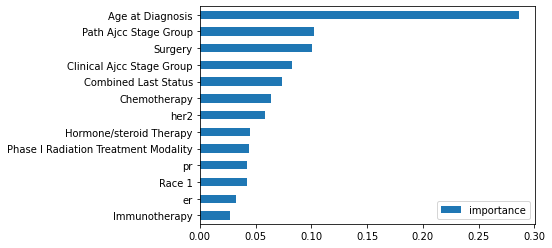

In [18]:
feature_importances.sort_values('importance', ascending=True).plot(kind='barh')

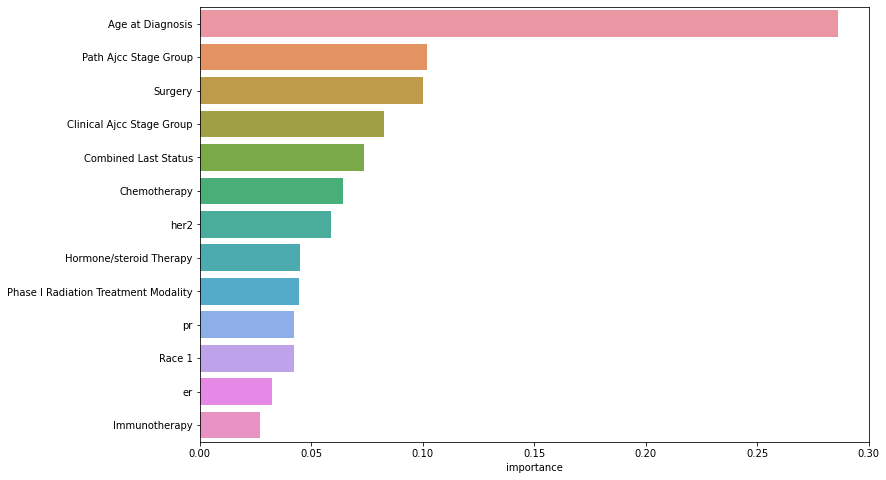

In [31]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances)

In [34]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

xgb_accuracy = accuracy_score(xgb_pred, y_test)

xgb_accuracy

0.8556566970091027

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(knn_pred, y_test)

knn_accuracy

0.8940904493570293

In [36]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

svc_accuracy = accuracy_score(svc_pred, y_test)


In [37]:
svc_accuracy

0.7891923132495304